# THOR Data

#### Author: Joe Muscolino
#### Last Updated: 10-10-2023

In [1]:
from pandas import DataFrame
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

# Pt 1. Data Cleaning

In [2]:
thor_df = pd.read_csv("THOR_WWII_DATA_CLEAN (2).csv", dtype="string", encoding = "ISO-8859-1")
thor_df.shape

(178281, 58)

### Dataset contains 178,281 records of Aerial Bombing Missions

In [3]:
thor_df.head()

,WWII_ID,MASTER_INDEX_NUMBER,MSNDATE,THEATER,NAF,COUNTRY_FLYING_MISSION,TGT_COUNTRY_CODE,TGT_COUNTRY,TGT_LOCATION,TGT_TYPE,...,CALLSIGN,ROUNDS_AMMO,SPARES_RETURN_AC,WX_FAIL_AC,MECH_FAIL_AC,MISC_FAIL_AC,TARGET_COMMENT,MISSION_COMMENTS,SOURCE,DATABASE_EDIT_COMMENTS
0,1,<NA>,1943-08-15,MTO,12 AF,USA,13,ITALY,SPADAFORA,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
1,4285,20028,1945-02-20,PTO,5 AF,USA,<NA>,PHILIPPINE ISLANDS,PUERTA PRINCESA,UNIDENTIFIED TARGET,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
2,3,<NA>,1943-08-15,MTO,12 AF,USA,13,ITALY,COSENZA,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
3,4,<NA>,1943-08-15,MTO,12 AF,USA,13,ITALY,GIOJA TAURO,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,1,<NA>,<NA>,<NA>,<NA>
4,8167,14639,1945-02-23,PTO,5 AF,USA,<NA>,PHILIPPINE ISLANDS,BALETE PASS,WOODED AREA,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>


In [4]:
thor_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178281 entries, 0 to 178280
Data columns (total 58 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   WWII_ID                   178281 non-null  string
 1   MASTER_INDEX_NUMBER       174236 non-null  string
 2   MSNDATE                   178281 non-null  string
 3   THEATER                   175123 non-null  string
 4   NAF                       126444 non-null  string
 5   COUNTRY_FLYING_MISSION    126494 non-null  string
 6   TGT_COUNTRY_CODE          129357 non-null  string
 7   TGT_COUNTRY               177682 non-null  string
 8   TGT_LOCATION              176018 non-null  string
 9   TGT_TYPE                  146369 non-null  string
 10  TGT_ID                    127401 non-null  string
 11  TGT_INDUSTRY_CODE         127907 non-null  string
 12  TGT_INDUSTRY              126479 non-null  string
 13  LATITUDE                  169565 non-null  string
 14  LONG

In [5]:
# Calculate the average missing rate in the sales column.
missing_data = thor_df.isna().mean()

# Convert the missing_sales from a decimal to a percentage and round to 2 decimal places.
missing_data = round(missing_data*100, 2)
missing_data

WWII_ID 0.00
MASTER_INDEX_NUMBER 2.27
MSNDATE 0.00
THEATER 1.77
NAF 29.08
COUNTRY_FLYING_MISSION 29.05
TGT_COUNTRY_CODE 27.44
TGT_COUNTRY 0.34
TGT_LOCATION 1.27
TGT_TYPE 17.90
TGT_ID 28.54
TGT_INDUSTRY_CODE 28.26
TGT_INDUSTRY 29.06
LATITUDE 4.89
LONGITUDE 4.90
UNIT_ID 71.44
MDS 0.07
AIRCRAFT_NAME 0.08
MSN_TYPE 73.53
TGT_PRIORITY 24.44
TGT_PRIORITY_EXPLANATION 50.68
AC_ATTACKING 29.82
ALTITUDE 32.23
ALTITUDE_FEET 63.13
NUMBER_OF_HE 80.52
TYPE_OF_HE 76.47
LBS_HE 98.87
TONS_OF_HE 17.99
NUMBER_OF_IC 98.16
TYPE_OF_IC 96.90
LBS_IC 99.80
TONS_OF_IC 85.56
NUMBER_OF_FRAG 96.77
TYPE_OF_FRAG 96.77
LBS_FRAG 99.89
TONS_OF_FRAG 90.52
TOTAL_LBS 98.81
TOTAL_TONS 6.60
TAKEOFF_BASE 98.10
TAKEOFF_COUNTRY 98.13
AC_LOST 99.91
AC_DAMAGED 99.98
AC_AIRBORNE 53.87
AC_DROPPING 54.22
TIME_OVER_TARGET 99.62
SIGHTING_METHOD_CODE 44.84
SIGHTING_EXPLANATION 75.34
BDA 99.94
CALLSIGN 99.99
ROUNDS_AMMO 100.00
SPARES_RETURN_AC 99.93
WX_FAIL_AC 99.90
MECH_FAIL_AC 99.98
MISC_FAIL_AC 99.95
TARGET_COMMENT 99.97
MISSION_COMMENTS 99.99
SOURCE 99.95
DATABASE_EDIT_COMMENTS 99.68
dtype: float64

### Remove columns where at least 96% of the data is missing. 

In [6]:
# Parse index of previous missing_data and check how much data is missing from column, if 98% or more is missing, drop it. 
for col in missing_data.index:
    if missing_data[col] >= 96:
        thor_df.drop(columns=[col], inplace=True)

### Drop DataFrame rows where *COUNTRY_FLYING_MISSION* is null.

In [7]:
# Drop DataFrame rows where COUNTRY_FLYING_MISSION is null.
thor_df = thor_df.dropna(subset="COUNTRY_FLYING_MISSION")
thor_df.shape

(126494, 34)

### Convert DataFrame column values

In [8]:
# Convert columns to float
thor_df[["TOTAL_TONS", "TONS_OF_HE", "AC_AIRBORNE", "AC_DROPPING", "ALTITUDE", "AC_ATTACKING"]] = \
    thor_df[["TOTAL_TONS", "TONS_OF_HE", "AC_AIRBORNE", "AC_DROPPING", "ALTITUDE", "AC_ATTACKING"]].astype("float")

# Convert column to Datetime
thor_df["MSNDATE"] = pd.to_datetime(thor_df["MSNDATE"])

In [9]:
# Replace missing column values with 'Other'
thor_df[["TGT_COUNTRY", "TGT_INDUSTRY", "THEATER", "NAF", "TGT_LOCATION", "AIRCRAFT_NAME"]] = \
    thor_df[["TGT_COUNTRY", "TGT_INDUSTRY", "THEATER", "NAF", "TGT_LOCATION", "AIRCRAFT_NAME"]].replace(np.nan, "Other")

### Add new columns

In [10]:
# Create new columns for Month and Year of Mission
thor_df["MSNMONTH"] = thor_df["MSNDATE"].dt.strftime('%Y-%m')
thor_df["MSNYEAR"] = thor_df["MSNDATE"].dt.strftime('%Y')

In [11]:
thor_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 126494 entries, 0 to 178280
Data columns (total 36 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   WWII_ID                   126494 non-null  string        
 1   MASTER_INDEX_NUMBER       122449 non-null  string        
 2   MSNDATE                   126494 non-null  datetime64[ns]
 3   THEATER                   126494 non-null  string        
 4   NAF                       126494 non-null  string        
 5   COUNTRY_FLYING_MISSION    126494 non-null  string        
 6   TGT_COUNTRY_CODE          77572 non-null   string        
 7   TGT_COUNTRY               126494 non-null  string        
 8   TGT_LOCATION              126494 non-null  string        
 9   TGT_TYPE                  118294 non-null  string        
 10  TGT_ID                    75624 non-null   string        
 11  TGT_INDUSTRY_CODE         76125 non-null   string        
 12  TG

### Reformat Allied Country Names so they aren't uppercase.
Below are the allied countries included in dataset BEFORE reformatting.

In [12]:
# View list of allied countries included in dataset BEFORE reformatting.
print("BEFORE:")
print(list(thor_df["COUNTRY_FLYING_MISSION"].unique()), end='\n\n')

# Reformat String values, and do the same thing to the column TGT_COUNTRY
thor_df["COUNTRY_FLYING_MISSION"] = thor_df["COUNTRY_FLYING_MISSION"].str.title()
thor_df["TGT_COUNTRY"] = thor_df["TGT_COUNTRY"].str.title()
thor_df["COUNTRY_FLYING_MISSION"] = thor_df["COUNTRY_FLYING_MISSION"].replace("Usa", "USA")

print("AFTER:")
print(list(thor_df["COUNTRY_FLYING_MISSION"].unique()))

BEFORE:
['USA', 'GREAT BRITAIN', 'NEW ZEALAND', 'AUSTRALIA', 'SOUTH AFRICA']

AFTER:
['USA', 'Great Britain', 'New Zealand', 'Australia', 'South Africa']


### Modify THEATER column values to be more descriptive.

In [13]:
thor_df["THEATER"].unique()

<StringArray>
['MTO', 'PTO', 'ETO', 'Other', 'CBI', 'EAST AFRICA', 'MADAGASCAR']
Length: 7, dtype: string

In [14]:
thor_df["THEATER"] = thor_df["THEATER"].replace("ETO", "European Theater")
thor_df["THEATER"] = thor_df["THEATER"].replace("PTO", "Pacific Theater")
thor_df["THEATER"] = thor_df["THEATER"].replace("MTO", "Mediterranean Theater")
thor_df["THEATER"] = thor_df["THEATER"].replace("CBI", "China Burma India Theater")
thor_df["THEATER"] = thor_df["THEATER"].replace("EAST AFRICA", "East Africa")
thor_df["THEATER"] = thor_df["THEATER"].replace("MADAGASCAR", "Madagascar")

In [15]:
thor_df.head()

,WWII_ID,MASTER_INDEX_NUMBER,MSNDATE,THEATER,NAF,COUNTRY_FLYING_MISSION,TGT_COUNTRY_CODE,TGT_COUNTRY,TGT_LOCATION,TGT_TYPE,...,TONS_OF_HE,TONS_OF_IC,TONS_OF_FRAG,TOTAL_TONS,AC_AIRBORNE,AC_DROPPING,SIGHTING_METHOD_CODE,SIGHTING_EXPLANATION,MSNMONTH,MSNYEAR
0,1,<NA>,1943-08-15,Mediterranean Theater,12 AF,USA,13,Italy,SPADAFORA,<NA>,...,10.0,<NA>,<NA>,10.0,20.0,20.0,<NA>,<NA>,1943-08,1943
1,4285,20028,1945-02-20,Pacific Theater,5 AF,USA,<NA>,Philippine Islands,PUERTA PRINCESA,UNIDENTIFIED TARGET,...,NaN,<NA>,<NA>,NaN,NaN,NaN,<NA>,<NA>,1945-02,1945
2,3,<NA>,1943-08-15,Mediterranean Theater,12 AF,USA,13,Italy,COSENZA,<NA>,...,9.0,<NA>,<NA>,9.0,18.0,36.0,<NA>,<NA>,1943-08,1943
3,4,<NA>,1943-08-15,Mediterranean Theater,12 AF,USA,13,Italy,GIOJA TAURO,<NA>,...,7.5,<NA>,<NA>,7.5,15.0,15.0,<NA>,<NA>,1943-08,1943
4,8167,14639,1945-02-23,Pacific Theater,5 AF,USA,<NA>,Philippine Islands,BALETE PASS,WOODED AREA,...,NaN,<NA>,<NA>,NaN,NaN,NaN,<NA>,<NA>,1945-02,1945


# Pt 2. Data Exploration

### Create two DataFrame copies, one for US missions and another for Great Britian, we'll use these frequently for comparison.
 

In [16]:
us_missions = thor_df[thor_df["COUNTRY_FLYING_MISSION"] == "USA"]
gb_missions = thor_df[thor_df["COUNTRY_FLYING_MISSION"] == "Great Britain"]

## 1. Country Flying Missions

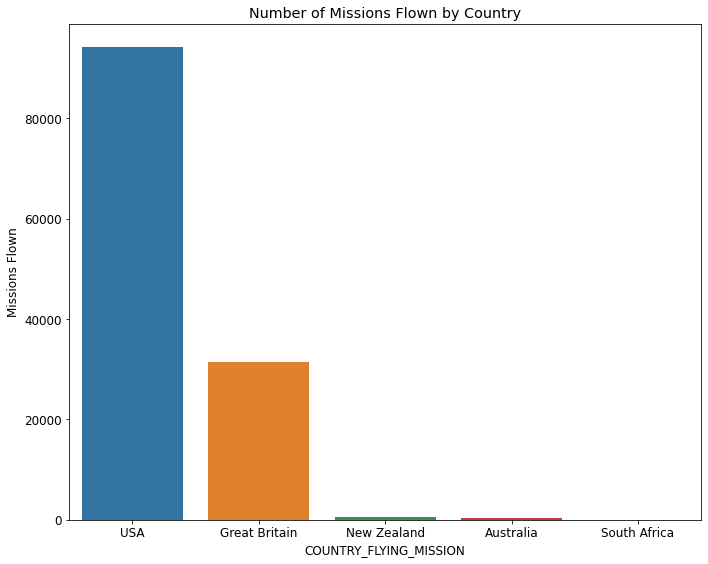

In [17]:
# Plot Number of Missions by Country
plt.figure(figsize=(10,8))
plt.rcParams.update({'font.size': 12})
plt.title("Number of Missions Flown by Country")
sns.countplot(x=thor_df["COUNTRY_FLYING_MISSION"])
plt.ylabel("Missions Flown")
plt.tight_layout()
plt.show()

### Group By COUNTRY_FLYING_MISSION

In [18]:
country_flying_df = thor_df.groupby("COUNTRY_FLYING_MISSION").mean(numeric_only=True).round(2)
country_flying_df = country_flying_df.sort_values(by="TOTAL_TONS", ascending=False)
country_flying_df.head()

,AC_ATTACKING,ALTITUDE,TONS_OF_HE,TOTAL_TONS,AC_AIRBORNE,AC_DROPPING
COUNTRY_FLYING_MISSION,,,,,,
Great Britain,9.12,165.68,36.30,42.21,9.27,9.12
USA,9.23,109.50,17.08,18.32,13.32,13.46
New Zealand,8.21,6.25,9.13,4.17,6.60,NaN
Australia,3.68,40.77,1.50,1.57,4.32,4.12
South Africa,4.25,21.56,NaN,0.73,4.43,7.18


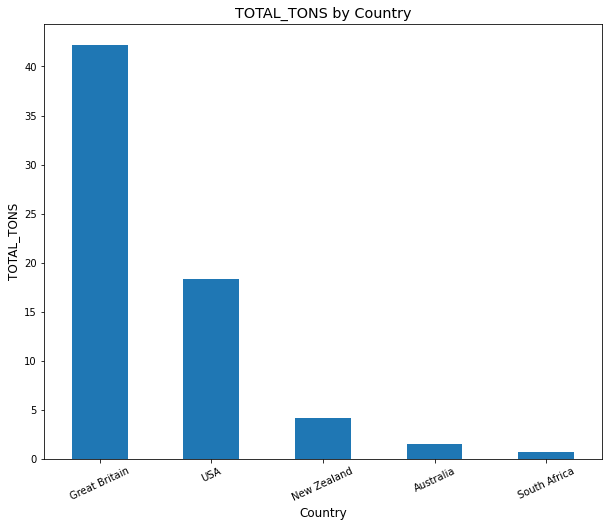

In [19]:
# Visualize countries ranked by Total Tons used. 
country_flying_df["TOTAL_TONS"].plot(kind='bar', figsize=(10,8), use_index=True, fontsize=10, rot=25, ylabel="TOTAL_TONS", xlabel="Country", title="TOTAL_TONS by Country")
plt.show()

## 2. Missions by Year

In [20]:
# Create a DataFrame copy so we can modify row/column values if necessary without editing our original DataFrame
temp = thor_df.copy()
temp["MSNMONTH"] = pd.to_datetime(temp["MSNMONTH"])

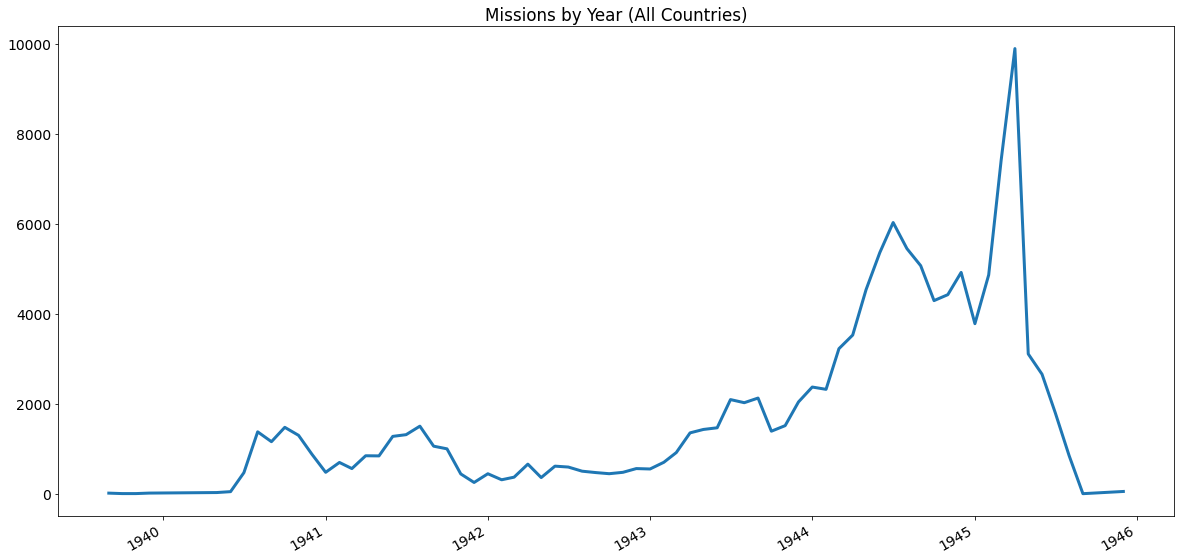

In [21]:
# Missions Timeline
count_ms_month = temp["MSNMONTH"].value_counts().sort_index(ascending=True)

# Plot Data
plt.figure(figsize=[20,10])
plt.rcParams.update({'font.size': 14})
plt.title('Missions by Year (All Countries)')
plt.plot(count_ms_month, linewidth ='3.0')
plt.gcf().autofmt_xdate()
plt.show()

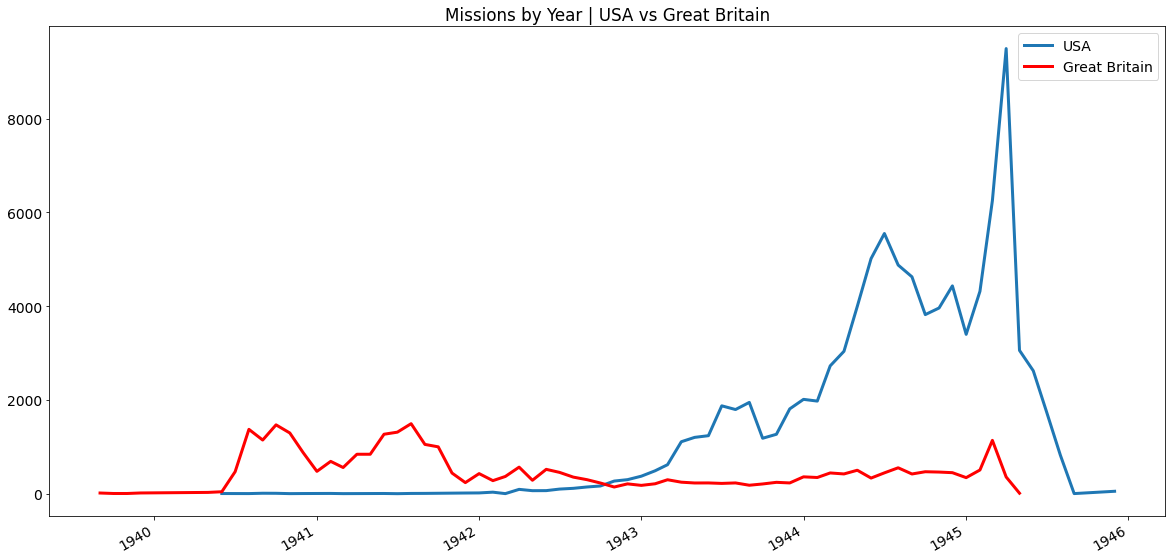

In [22]:
# Missions Timeline - USA vs GB

us_missions_by_year = temp["MSNMONTH"][temp["COUNTRY_FLYING_MISSION"] == "USA"].value_counts().sort_index(ascending=True)
gb_missions_by_year = temp["MSNMONTH"][temp["COUNTRY_FLYING_MISSION"] == "Great Britain"].value_counts().sort_index(ascending=True)

# Plot data
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 14})
plt.plot(us_missions_by_year, linewidth ='3.0')
plt.plot(gb_missions_by_year, color="red", linewidth ='3.0')
plt.legend(["USA", "Great Britain"])
plt.title("Missions by Year | USA vs Great Britain")
plt.gcf().autofmt_xdate()
plt.show()

## Target Country

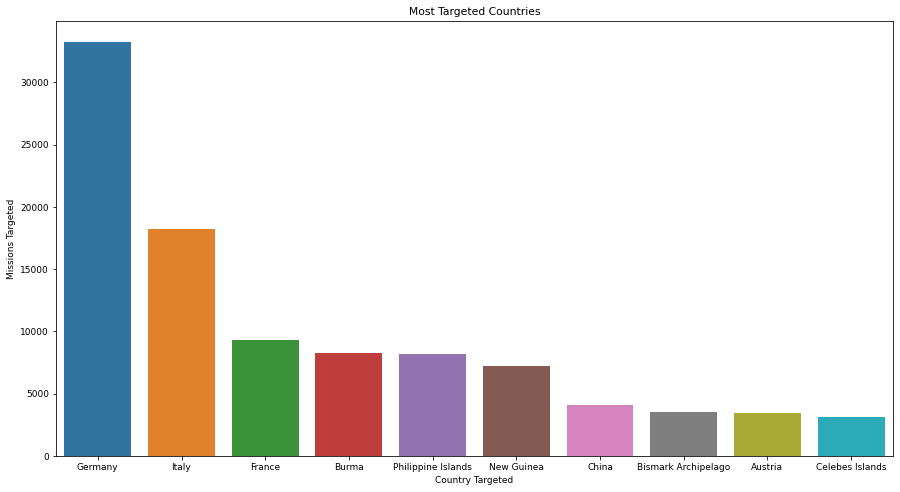

In [26]:
most_targeted = thor_df["TGT_COUNTRY"].value_counts()[:10].sort_values(ascending=True)
targeted_countries = most_targeted.index.to_list()
top5_targets = thor_df[thor_df["TGT_COUNTRY"].isin(targeted_countries)]

# Plot top5_targets
plt.figure(figsize=(15,8))
plt.rcParams.update({'font.size': 9})
plt.title("Most Targeted Countries")
sns.countplot(x=top5_targets["TGT_COUNTRY"], order=top5_targets["TGT_COUNTRY"].value_counts().index)
plt.xlabel("Country Targeted")
plt.ylabel("Missions Targeted")
plt.show()

In [24]:
# Group By TGT_COUNTRY
tgt_country_df = thor_df.groupby("TGT_COUNTRY").mean(numeric_only=True).round(2)
tgt_country_df

,AC_ATTACKING,ALTITUDE,TONS_OF_HE,TOTAL_TONS,AC_AIRBORNE,AC_DROPPING
TGT_COUNTRY,,,,,,
"""Papua New Guinea, Manus Island""",2.67,65.00,4.00,4.00,2.67,2.67
Albania,7.54,144.15,31.06,9.77,22.60,7.54
Aleutian Islands,4.43,45.29,4.65,4.61,NaN,NaN
Algeria,NaN,105.00,9.00,9.00,NaN,NaN
Andaman Islands,3.38,5000.00,5.33,5.33,3.38,3.38
...,...,...,...,...,...,...
Unknown,9.00,37.89,4.21,4.21,NaN,NaN
Unknown Or Not Indicated,6.37,94.81,18.16,17.18,6.37,6.37
Volcano And Bonin Islands,5.57,122.90,10.26,9.24,NaN,NaN


## TOTAL_TONS

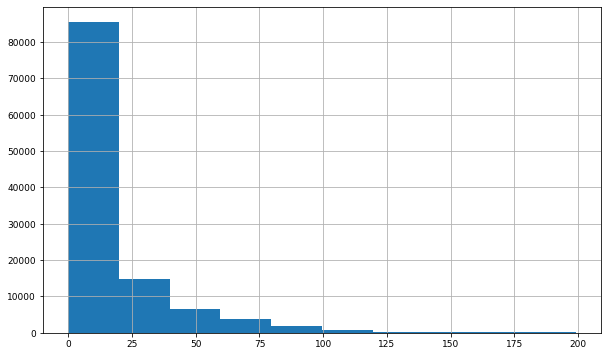

In [25]:
temp = thor_df[thor_df["TOTAL_TONS"] < 200]
temp["TOTAL_TONS"].hist(figsize=(10, 6))
plt.show()

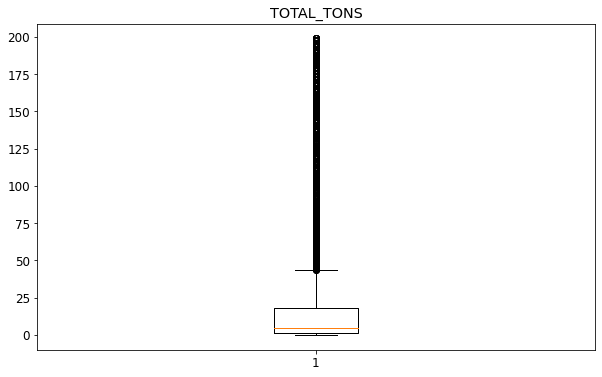

In [61]:
# Box Plot
plt.figure(figsize=(10, 6))
plt.title("TOTAL_TONS")
plt.boxplot(temp["TOTAL_TONS"]) 
plt.show()

## THEATER

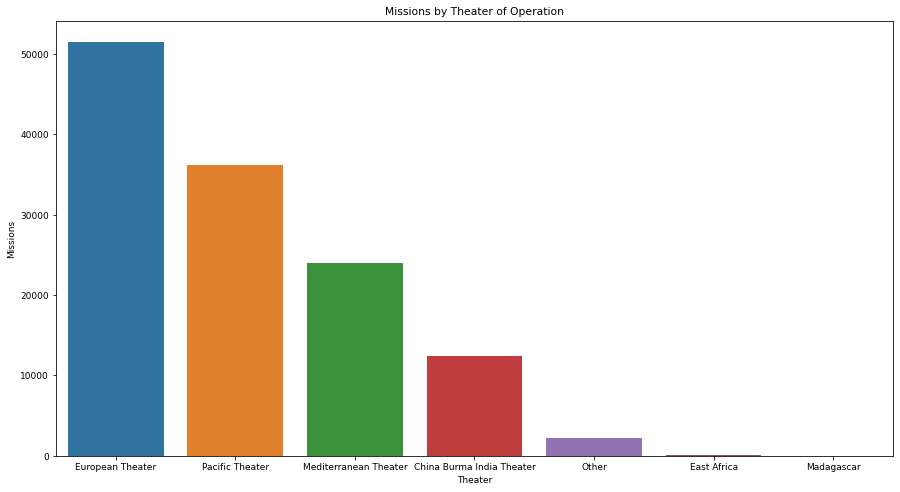

In [27]:
# Plot Number of Missions by Theater
plt.figure(figsize=(15,8))
plt.rcParams.update({'font.size': 9})
plt.title("Missions by Theater of Operation")
sns.countplot(x=thor_df["THEATER"], order=thor_df["THEATER"].value_counts().index)
plt.xlabel("Theater")
plt.ylabel("Missions")
plt.show()